In [1]:
#!git clone https://github.com/Holstrup/Mask_RCNN 
import os
os.chdir("Mask_RCNN/samples/wireframe")

FileNotFoundError: [Errno 2] No such file or directory: 'Mask_RCNN/samples/wireframe'

In [1]:
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

from samples.wireframe import Wireframe
import keras 

%matplotlib inline 

Using TensorFlow backend.


In [2]:
config = Wireframe.WireframeConfig()
WIREFRAME_DIR = os.path.join(ROOT_DIR, "datasets/wireframe")

In [3]:
NUM_TRAINING_IMAGES = 100
MAX_ICONS_PER_IMAGE = 1

# Training dataset
dataset_train = Wireframe.WireframeDataset()
dataset_train.generate_data(NUM_TRAINING_IMAGES, MAX_ICONS_PER_IMAGE)

dataset_train.load_wireframe(WIREFRAME_DIR, "train")
dataset_train.prepare()

# Validation dataset
dataset_val = Wireframe.WireframeDataset()
dataset_val.load_wireframe(WIREFRAME_DIR, "val")
dataset_val.prepare()

In [4]:
dataset_train.class_info

[{'source': '', 'id': 0, 'name': 'BG'},
 {'source': 'wireframe', 'id': 1, 'name': 'A'},
 {'source': 'wireframe', 'id': 2, 'name': 'Cross'},
 {'source': 'wireframe', 'id': 3, 'name': 'D'},
 {'source': 'wireframe', 'id': 4, 'name': 'Done'},
 {'source': 'wireframe', 'id': 5, 'name': 'H'},
 {'source': 'wireframe', 'id': 6, 'name': 'Heart'},
 {'source': 'wireframe', 'id': 7, 'name': 'Home'},
 {'source': 'wireframe', 'id': 8, 'name': 'I'},
 {'source': 'wireframe', 'id': 9, 'name': 'Menu'},
 {'source': 'wireframe', 'id': 10, 'name': 'More'},
 {'source': 'wireframe', 'id': 11, 'name': 'R'},
 {'source': 'wireframe', 'id': 12, 'name': 'Search'},
 {'source': 'wireframe', 'id': 13, 'name': 'U'},
 {'source': 'wireframe', 'id': 14, 'name': 'Wifi'},
 {'source': 'wireframe', 'id': 15, 'name': 'Z'}]

In [5]:
# Load dataset
# Get the dataset from the releases page
# https://github.com/matterport/Mask_RCNN/releases

dataset = Wireframe.WireframeDataset()
dataset.load_wireframe(WIREFRAME_DIR, "train")

# Must call before using the dataset
dataset.prepare()

print("Image Count: {}".format(len(dataset_train.image_ids)))
print("Class Count: {}".format(dataset_train.num_classes))
for i, info in enumerate(dataset_train.class_info):
    print("{:3}. {:50}".format(i, info['name']))

Image Count: 100
Class Count: 16
  0. BG                                                
  1. A                                                 
  2. Cross                                             
  3. D                                                 
  4. Done                                              
  5. H                                                 
  6. Heart                                             
  7. Home                                              
  8. I                                                 
  9. Menu                                              
 10. More                                              
 11. R                                                 
 12. Search                                            
 13. U                                                 
 14. Wifi                                              
 15. Z                                                 


In [ ]:
# Load and display random samples
image_ids = np.random.choice(dataset.image_ids, 4)
for image_id in image_ids:
    image = dataset_train.load_image(image_id)
    mask, class_ids = dataset_train.load_mask(image_id)
    visualize.display_top_masks(image, mask, class_ids, dataset_train.class_names)

In [10]:
# Load random image and mask.
image_id = random.choice(dataset_train.image_ids)
image = dataset_train.load_image(image_id)
mask, class_ids = dataset_train.load_mask(image_id)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id ", image_id, dataset.image_reference(image_id))
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset_train.class_names)

IndexError: Cannot choose from an empty sequence

image_id:  42 /Users/alexanderholstrup/git/Mask_RCNN/datasets/wireframe/train/42.png
Original shape:  (1200, 900, 3)
image                    shape: (512, 512, 3)         min:    0.00000  max:  179.00000  uint8
mask                     shape: (512, 512, 2)         min:    0.00000  max:    1.00000  bool
class_ids                shape: (2,)                  min:    3.00000  max:   10.00000  int64
bbox                     shape: (2, 4)                min:  150.00000  max:  447.00000  int32


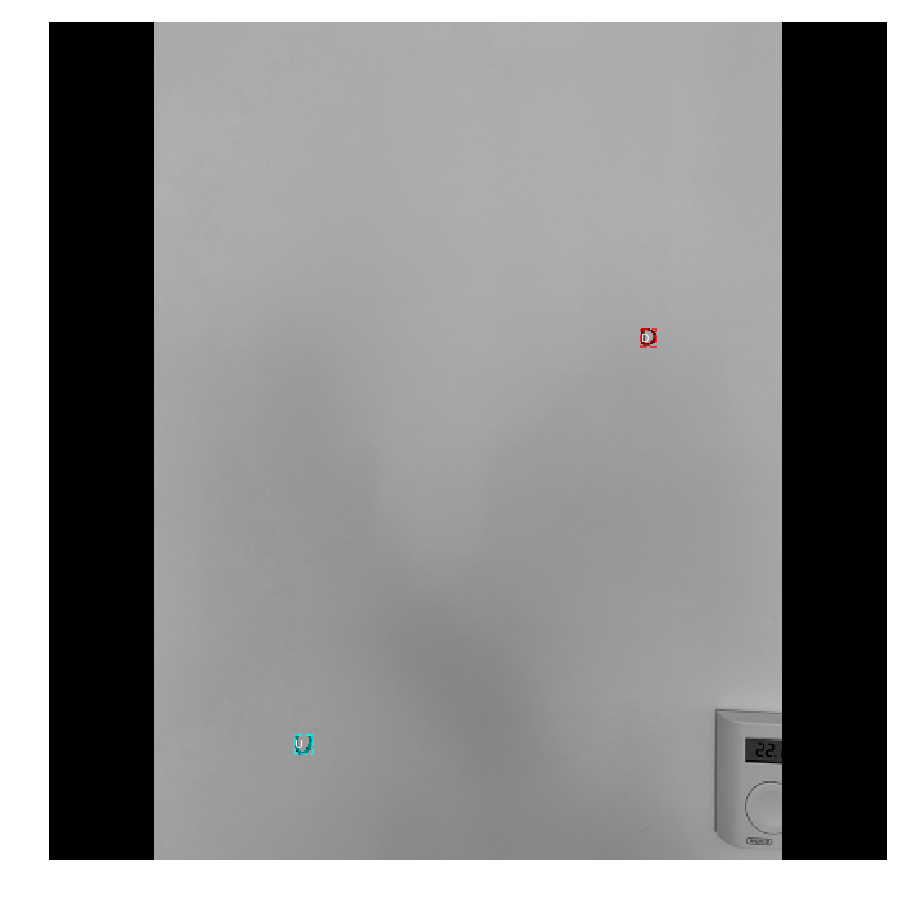

In [7]:
# Load random image and mask.
image_id = np.random.choice(dataset_train.image_ids, 1)[0]
image = dataset_train.load_image(image_id)
mask, class_ids = dataset_train.load_mask(image_id)
original_shape = image.shape
# Resize
image, window, scale, padding, _ = utils.resize_image(
    image, 
    min_dim=config.IMAGE_MIN_DIM, 
    max_dim=config.IMAGE_MAX_DIM,
    mode=config.IMAGE_RESIZE_MODE)
mask = utils.resize_mask(mask, scale, padding)
# Compute Bounding box
bbox = utils.extract_bboxes(mask)

# Display image and additional stats
print("image_id: ", image_id, dataset_train.image_reference(image_id))
print("Original shape: ", original_shape)
log("image", image)
log("mask", mask)
log("class_ids", class_ids)
log("bbox", bbox)
# Display image and instances
visualize.display_instances(image, bbox, mask, class_ids, dataset_train.class_names)

image                    shape: (512, 512, 3)         min:    0.00000  max:  221.00000  uint8
image_meta               shape: (28,)                 min:    0.00000  max: 1200.00000  float64
class_ids                shape: (1,)                  min:    9.00000  max:    9.00000  int64
bbox                     shape: (1, 4)                min:   34.00000  max:  269.00000  int32
mask                     shape: (56, 56, 1)           min:    0.00000  max:    1.00000  bool
[4.30000000e+01 1.20000000e+03 9.00000000e+02 3.00000000e+00
 5.12000000e+02 5.12000000e+02 3.00000000e+00 0.00000000e+00
 6.40000000e+01 5.12000000e+02 4.48000000e+02 4.26666667e-01
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00]


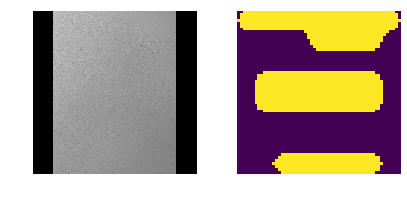

In [45]:
image_id = np.random.choice(dataset_train.image_ids, 1)[0]
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, use_mini_mask=True)

log("image", image)
log("image_meta", image_meta)
log("class_ids", class_ids)
log("bbox", bbox)
log("mask", mask)
print(image_meta)
display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

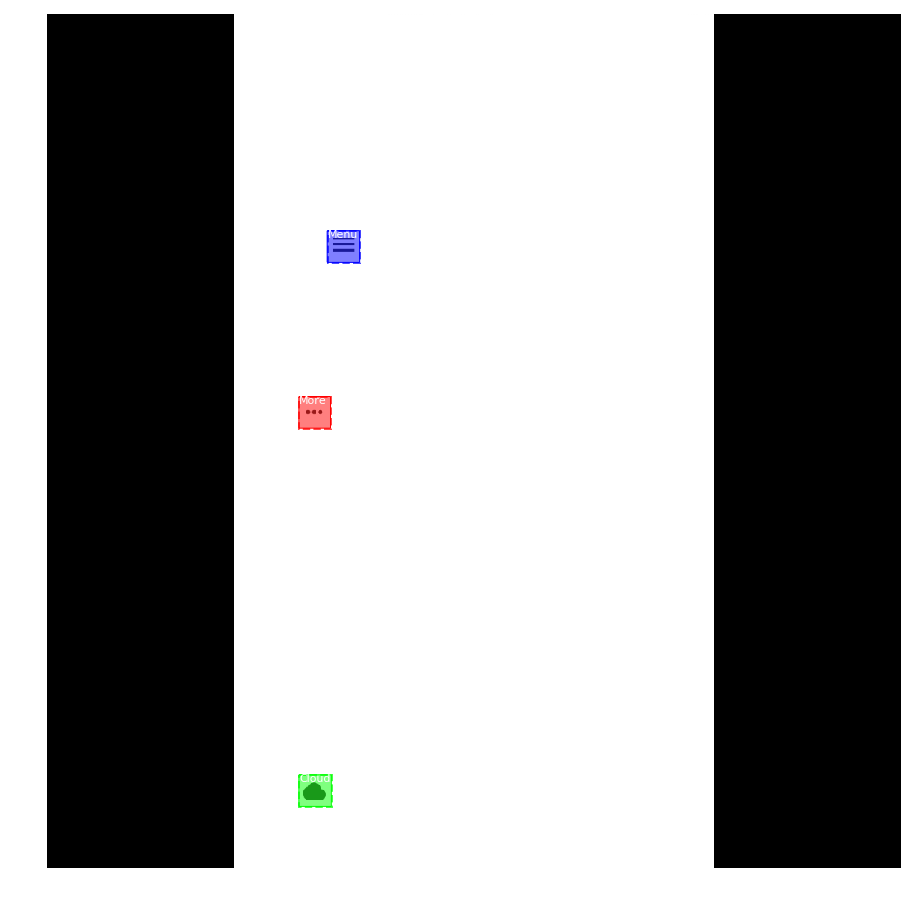

In [33]:
visualize.display_instances(image, bbox, mask, class_ids, dataset_train.class_names)

In [7]:
# Add augmentation and mask resizing.
image, image_meta, class_ids, bbox, mask = modellib.load_image_gt(
    dataset, config, image_id, augment=True, use_mini_mask=True)
log("mask", mask)
display_images([image]+[mask[:,:,i] for i in range(min(mask.shape[-1], 7))])

NameError: name 'image_id' is not defined

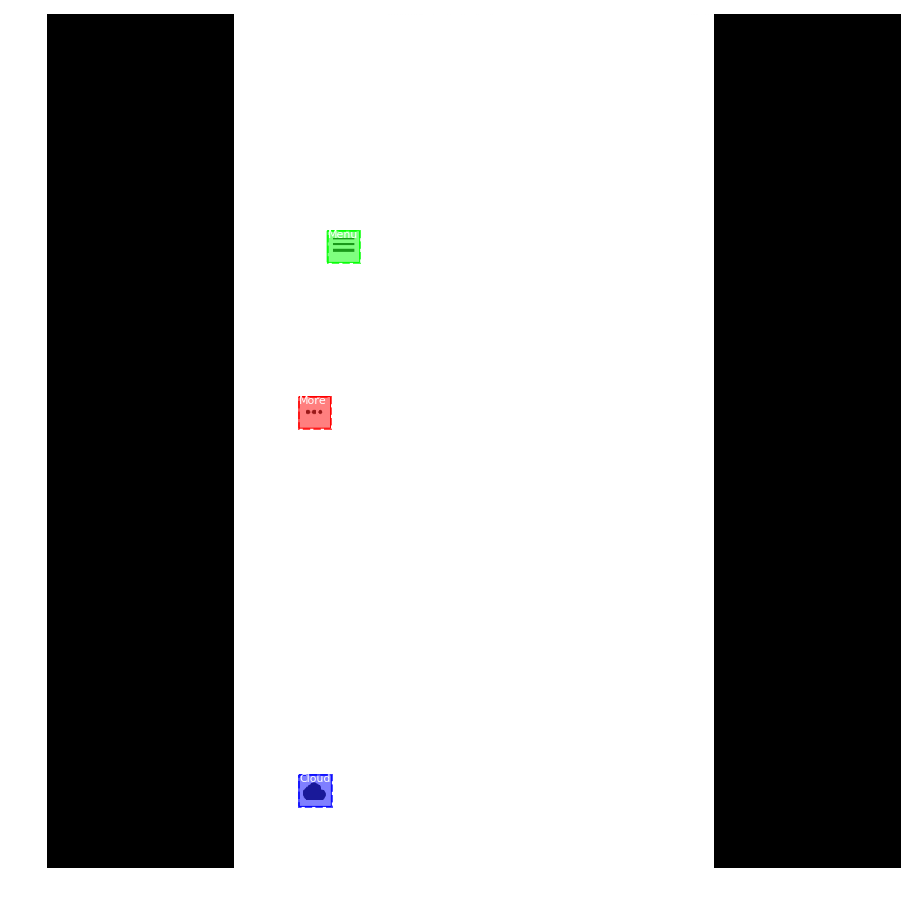

In [35]:
mask = utils.expand_mask(bbox, mask, image.shape)
visualize.display_instances(image, bbox, mask, class_ids, dataset_train.class_names)

# Anchors
The order of anchors is important. Use the same order in training and prediction phases. And it must match the order of the convolution execution.

For an FPN network, the anchors must be ordered in a way that makes it easy to match anchors to the output of the convolution layers that predict anchor scores and shifts.

Sort by pyramid level first. All anchors of the first level, then all of the second and so on. This makes it easier to separate anchors by level.
Within each level, sort anchors by feature map processing sequence. Typically, a convolution layer processes a feature map starting from top-left and moving right row by row.
For each feature map cell, pick any sorting order for the anchors of different ratios. Here we match the order of ratios passed to the function.
Anchor Stride: In the FPN architecture, feature maps at the first few layers are high resolution. For example, if the input image is 1024x1024 then the feature meap of the first layer is 256x256, which generates about 200K anchors (2562563). These anchors are 32x32 pixels and their stride relative to image pixels is 4 pixels, so there is a lot of overlap. We can reduce the load significantly if we generate anchors for every other cell in the feature map. A stride of 2 will cut the number of anchors by 4, for example.

In this implementation we use an anchor stride of 2, which is different from the paper.

In [36]:
# Generate Anchors
backbone_shapes = modellib.compute_backbone_shapes(config, config.IMAGE_SHAPE)
anchors = utils.generate_pyramid_anchors(config.RPN_ANCHOR_SCALES, 
                                          config.RPN_ANCHOR_RATIOS,
                                          backbone_shapes,
                                          config.BACKBONE_STRIDES, 
                                          config.RPN_ANCHOR_STRIDE)

# Print summary of anchors
num_levels = len(backbone_shapes)
anchors_per_cell = len(config.RPN_ANCHOR_RATIOS)
print("Count: ", anchors.shape[0])
print("Scales: ", config.RPN_ANCHOR_SCALES)
print("ratios: ", config.RPN_ANCHOR_RATIOS)
print("Anchors per Cell: ", anchors_per_cell)
print("Levels: ", num_levels)
anchors_per_level = []
for l in range(num_levels):
    num_cells = backbone_shapes[l][0] * backbone_shapes[l][1]
    anchors_per_level.append(anchors_per_cell * num_cells // config.RPN_ANCHOR_STRIDE**2)
    print("Anchors in Level {}: {}".format(l, anchors_per_level[l]))

Count:  261888
Scales:  (32, 64, 128, 256, 512)
ratios:  [0.5, 1, 2]
Anchors per Cell:  3
Levels:  5
Anchors in Level 0: 196608
Anchors in Level 1: 49152
Anchors in Level 2: 12288
Anchors in Level 3: 3072
Anchors in Level 4: 768


Level 0. Anchors: 196608  Feature map Shape: [256 256]
Level 1. Anchors:  49152  Feature map Shape: [128 128]
Level 2. Anchors:  12288  Feature map Shape: [64 64]
Level 3. Anchors:   3072  Feature map Shape: [32 32]
Level 4. Anchors:    768  Feature map Shape: [16 16]


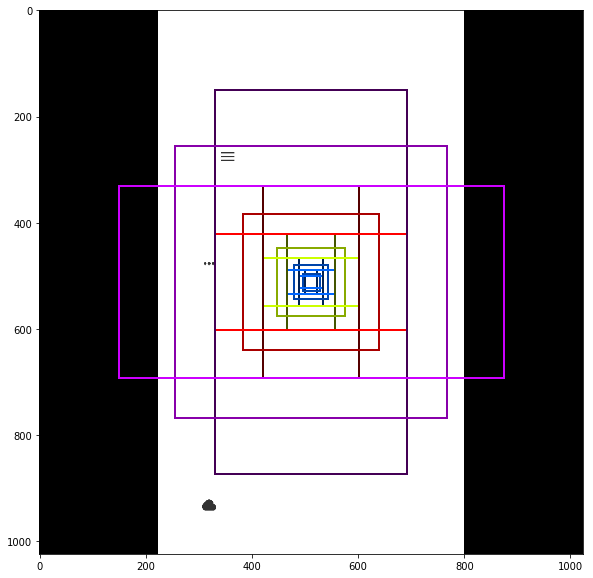

In [37]:
## Visualize anchors of one cell at the center of the feature map of a specific level

# Load and draw random image
image_id = np.random.choice(dataset_train.image_ids, 1)[0]
image, image_meta, _, _, _ = modellib.load_image_gt(dataset_train, config, image_id)
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.imshow(image)
levels = len(backbone_shapes)

for level in range(levels):
    colors = visualize.random_colors(levels)
    # Compute the index of the anchors at the center of the image
    level_start = sum(anchors_per_level[:level]) # sum of anchors of previous levels
    level_anchors = anchors[level_start:level_start+anchors_per_level[level]]
    print("Level {}. Anchors: {:6}  Feature map Shape: {}".format(level, level_anchors.shape[0], 
                                                                  backbone_shapes[level]))
    center_cell = backbone_shapes[level] // 2
    center_cell_index = (center_cell[0] * backbone_shapes[level][1] + center_cell[1])
    level_center = center_cell_index * anchors_per_cell 
    center_anchor = anchors_per_cell * (
        (center_cell[0] * backbone_shapes[level][1] / config.RPN_ANCHOR_STRIDE**2) \
        + center_cell[1] / config.RPN_ANCHOR_STRIDE)
    level_center = int(center_anchor)

    # Draw anchors. Brightness show the order in the array, dark to bright.
    for i, rect in enumerate(level_anchors[level_center:level_center+anchors_per_cell]):
        y1, x1, y2, x2 = rect
        p = patches.Rectangle((x1, y1), x2-x1, y2-y1, linewidth=2, facecolor='none',
                              edgecolor=(i+1)*np.array(colors[level]) / anchors_per_cell)
        ax.add_patch(p)

# Create Model

In [13]:
# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Local path to trained weights file
COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
# Download COCO trained weights from Releases if needed
if not os.path.exists(COCO_MODEL_PATH):
    utils.download_trained_weights(COCO_MODEL_PATH)
    
# Create model in training mode
model = modellib.MaskRCNN(mode="training", config=config,
                          model_dir=MODEL_DIR)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.print instead of tf.Print. Note that tf.print returns a no-output operator that directly prints the output. Outside of defuns or eager mode, this operator will not be executed unless it is directly specified in session.run or used as a control dependency for other operators. This is only a concern in graph mode. Below is an example of how to ensure tf.print executes in graph mode:
```python
    sess = tf.Session()
    with sess.as_default():
        tensor = tf.range(10)
        print_op = tf.print(tensor)
        with tf.control_dependencies([print_op]):
          out = tf.add(tensor, tensor)
        sess.run(out)
    ```
Additionally, to use tf.print in python 2.7, users must make sure to import
the following:

  `from __future__ import print_function`



In [ ]:
MODEL_NAME = ""


stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=4, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
csv_data = keras.callbacks.CSVLogger(MODEL_NAME, separator=',', append=False)


In [ ]:
# Train the head branches
# Passing layers="heads" freezes all layers except the head
# layers. You can also pass a regular expression to select
# which layers to train by name pattern.
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE, 
            epochs=1, 
            custom_callbacks = [stop_early, csv_data], 
            layers='heads')


Starting at epoch 0. LR=0.001

Checkpoint Path: /Users/alexanderholstrup/git/Mask_RCNN/logs/wireframe20190430T2218/mask_rcnn_wireframe_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
In model:  rpn_model
    rpn_conv_shared        (Conv2D)
    rpn_class_raw          (Conv2D)
    rpn_bbox_pred          (Conv2D)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv4       (Time

/usr/local/lib/python3.7/site-packages/tensorflow/python/ops/gradients_impl.py:110: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "
/usr/local/lib/python3.7/site-packages/keras/engine/training_generator.py:47: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


Epoch 1/1
  1/100 [..............................] - ETA: 1:50:32 - loss: 44.8524 - rpn_class_loss: 7.2207 - rpn_bbox_loss: 16.4761 - mrcnn_class_loss: 21.1555 - mrcnn_bbox_loss: 0.0000e+00 - mrcnn_mask_loss: 0.0000e+00

Process ForkPoolWorker-5:
Process ForkPoolWorker-4:
Process ForkPoolWorker-8:
Process ForkPoolWorker-7:
Process ForkPoolWorker-3:
Process ForkPoolWorker-6:
Process ForkPoolWorker-2:
Process ForkPoolWorker-1:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/C

KeyboardInterrupt
Process ForkPoolWorker-11:
Process ForkPoolWorker-9:
Process ForkPoolWorker-12:
Process ForkPoolWorker-13:
Process ForkPoolWorker-10:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kw

  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    tas

  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/queues.py", line 351, in get
    with self._rlock:
  File "/usr/local/Cellar/python/3.7.2_2/Frameworks/Python.framework/Versions/3.7/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    ta

In [ ]:
# Save weights
# Typically not needed because callbacks save after every epoch
# Uncomment to save manually
model_path = os.path.join(MODEL_DIR, MODEL_NAME + ".h5")
model.keras_model.save_weights(model_path)

In [ ]:
MODEL_NAME = ""

In [ ]:
# Fine tune all layers
# Passing layers="all" trains all layers. You can also 
# pass a regular expression to select which layers to
# train by name pattern.
model.train(dataset_train, dataset_val, 
            learning_rate=config.LEARNING_RATE / 10,
            epochs=2, 
            custom_callbacks = [stop_early, csv_data],
            layers="all")

In [ ]:
# Save weights
# Typically not needed because callbacks save after every epoch
# Uncomment to save manually
model_path = os.path.join(MODEL_DIR, "mask_rcnn_shapes.h5")
model.keras_model.save_weights(model_path)

# Generate Embeddings for training small network

In [17]:
from samples.wireframe.database_actions import reinitialize_table, add_encoding
from samples.wireframe.knn import overlaps_bool

reinitialize_table("Database.db")
for image_id in dataset_train.image_ids:
    print("Image no: {}".format(image_id))
    original_image, _, real_labels, real_bboxes, gt_mask = \
        modellib.load_image_gt(dataset_train, inference_config,
                               image_id, use_mini_mask=False)
    results = model.detect([original_image])
    detected_rois = results[0]['rois']
    embeddings = results[1]
    
    # For each roi: 
    for i, roi in enumerate(detected_rois):
        for j, bbox in enumerate(real_bboxes):
            if overlaps_bool(roi, bbox):
                embedding = embeddings[:, i, :]
                label = real_labels[j]
                add_encoding("Database.db", embedding, int(label))


Image no: 0
Image no: 1
Image no: 2
Image no: 3
Image no: 4
Image no: 5
Image no: 6
Image no: 7
Image no: 8
Image no: 9
Image no: 10
Image no: 11
Image no: 12
Image no: 13
Image no: 14
Image no: 15
Image no: 16
Image no: 17
Image no: 18
Image no: 19
Image no: 20
Image no: 21
Image no: 22
Image no: 23
Image no: 24
Image no: 25
Image no: 26
Image no: 27
Image no: 28
Image no: 29
Image no: 30
Image no: 31
Image no: 32
Image no: 33
Image no: 34
Image no: 35
Image no: 36
Image no: 37
Image no: 38
Image no: 39
Image no: 40
Image no: 41
Image no: 42
Image no: 43
Image no: 44
Image no: 45
Image no: 46
Image no: 47
Image no: 48
Image no: 49
Image no: 50
Image no: 51
Image no: 52
Image no: 53
Image no: 54
Image no: 55
Image no: 56
Image no: 57
Image no: 58
Image no: 59
Image no: 60
Image no: 61
Image no: 62
Image no: 63
Image no: 64
Image no: 65
Image no: 66
Image no: 67
Image no: 68
Image no: 69
Image no: 70
Image no: 71
Image no: 72
Image no: 73
Image no: 74
Image no: 75
Image no: 76
Image no:

# Detection

In [6]:
class InferenceConfig(Wireframe.WireframeConfig):
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

inference_config = InferenceConfig()

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Recreate the model in inference mode
model = modellib.MaskRCNN(mode="inference", 
                          config=inference_config,
                          model_dir=MODEL_DIR)

# Get path to saved weights
# Either set a specific path or find last trained weights
model_path = os.path.join(ROOT_DIR, "Mask_Res50.h5")
# model_path = model.find_last()

# Load trained weights
print("Loading weights from ", model_path)
model.load_weights(model_path, by_name=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Loading weights from  /Users/alexanderholstrup/git/Mask_RCNN/Mask_Res50.h5


original_image           shape: (512, 512, 3)         min:    0.00000  max:  221.00000  uint8
image_meta               shape: (28,)                 min:    0.00000  max: 1200.00000  float64
gt_class_id              shape: (1,)                  min:   14.00000  max:   14.00000  int64
gt_bbox                  shape: (1, 4)                min:  267.00000  max:  449.00000  int32
gt_mask                  shape: (512, 512, 1)         min:    0.00000  max:    1.00000  bool


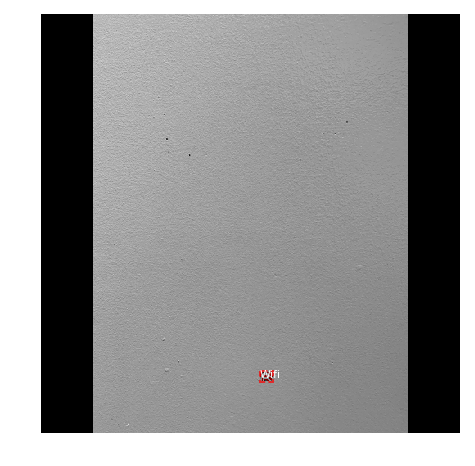

In [7]:
# Test on a random image
image_id = random.choice(dataset_train.image_ids)
original_image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset_train, inference_config, 
                           image_id, use_mini_mask=False)

log("original_image", original_image)
log("image_meta", image_meta)
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

visualize.display_instances(original_image, gt_bbox, gt_mask, gt_class_id, 
                            dataset_train.class_names, figsize=(8, 8))

In [28]:
results = model.detect([original_image])
results[0]["class_ids"]

array([ 4, 13,  3], dtype=int32)

In [21]:
model.OneShotAnchor(original_image, "Cross")

In [10]:
model.OneShotDetect(original_image)


[45.889812 22.689852 44.03399 ]
[0.67959213 0.33601892 0.65210885]
[32.04078674 66.39810801 34.78911519]


[[b'Cloud', b'Cross']]

Different functions to visualize the output of the detection. Uncomment to see

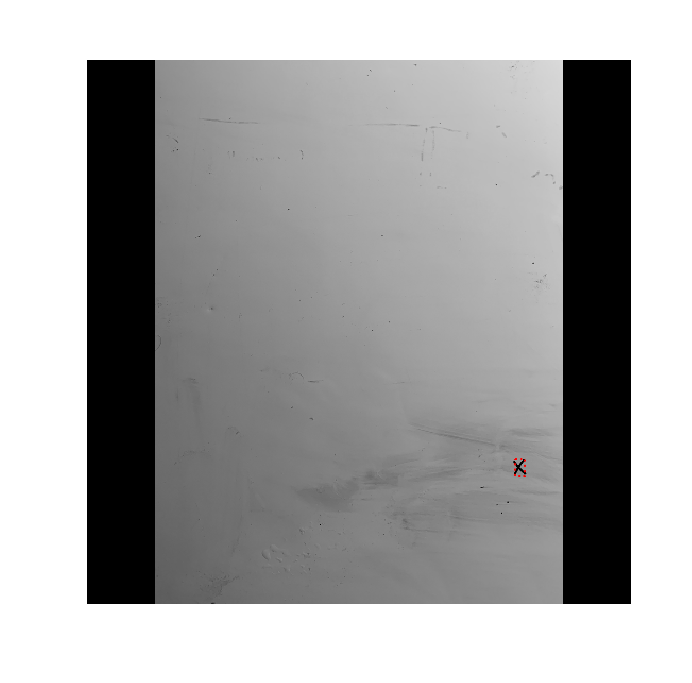

In [39]:
#visualize.display_top_masks(original_image, r['masks'],r['class_ids'], ["1","2","3","4","5"], limit=3)
#visualize.display_instances(original_image, r['rois'], r['masks'], r['class_ids'],  dataset_val.class_names, r['scores'])
visualize.draw_boxes(image, results[0]["rois"])

# Evaluation

In [72]:
def compute_ap(gt_boxes, gt_class_ids, gt_masks,
               pred_boxes, pred_class_ids, pred_scores, pred_masks,
               iou_threshold=0.5):
    """Compute Average Precision at a set IoU threshold (default 0.5).

    Returns:
    mAP: Mean Average Precision
    precisions: List of precisions at different class score thresholds.
    recalls: List of recall values at different class score thresholds.
    overlaps: [pred_boxes, gt_boxes] IoU overlaps.
    """
    # Get matches and overlaps
    gt_match, pred_match, overlaps = utils.compute_matches(
        gt_boxes, gt_class_ids, gt_masks,
        pred_boxes, pred_class_ids, pred_scores, pred_masks,
        iou_threshold)
    
    print(overlaps)
    
    # Compute precision and recall at each prediction box step
    precisions = np.cumsum(pred_match > -1) / (np.arange(len(pred_match)) + 1)
    recalls = np.cumsum(pred_match > -1).astype(np.float32) / len(gt_match)

    

    # Pad with start and end values to simplify the math
    precisions = np.concatenate([[0], precisions, [0]])
    recalls = np.concatenate([[0], recalls, [1]])

    # Ensure precision values decrease but don't increase. This way, the
    # precision value at each recall threshold is the maximum it can be
    # for all following recall thresholds, as specified by the VOC paper.
    for i in range(len(precisions) - 2, -1, -1):
        precisions[i] = np.maximum(precisions[i], precisions[i + 1])

    # Compute mean AP over recall range
    indices = np.where(recalls[:-1] != recalls[1:])[0] + 1
    mAP = np.sum((recalls[indices] - recalls[indices - 1]) *
                 precisions[indices])

    return mAP, precisions, recalls, overlaps


In [73]:
# Compute VOC-Style mAP @ IoU=0.5
# Running on 10 images. Increase for better accuracy.
image_ids = np.random.choice(dataset_train.image_ids, 1)
APs = []
for image_id in image_ids:
    # Load image and ground truth data
    image, image_meta, gt_class_id, gt_bbox, gt_mask =\
        modellib.load_image_gt(dataset_train, inference_config,
                               image_id, use_mini_mask=False)
    molded_images = np.expand_dims(modellib.mold_image(image, inference_config), 0)
    # Run object detection
    results = model.detect([image], verbose=0)
    r = results[0]
    # Compute AP
    AP, precisions, recalls, overlaps =\
        compute_ap(gt_bbox, gt_class_id, gt_mask,
                         r["rois"], r["class_ids"], r["scores"], r['masks'])
    APs.append(AP)
    
    print(gt_bbox)
    print(r["rois"])
print("mAP: ", np.mean(APs))

[[0.4509804]]
[[227 401 239 412]]
[[228 403 240 412]]
mAP:  0.0


In [74]:
print(np.shape(gt_mask))
print(np.shape(r['masks']))

(512, 512, 1)
(512, 512, 1)


In [75]:
target = gt_mask
prediction = r['masks']
intersection = np.logical_and(target, prediction)
union = np.logical_or(target, prediction)
iou_score = np.sum(intersection) / np.sum(union)
print(iou_score)

0.45098039215686275


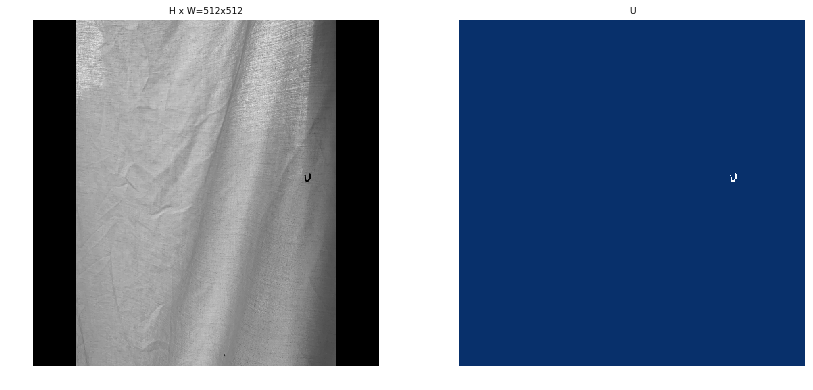

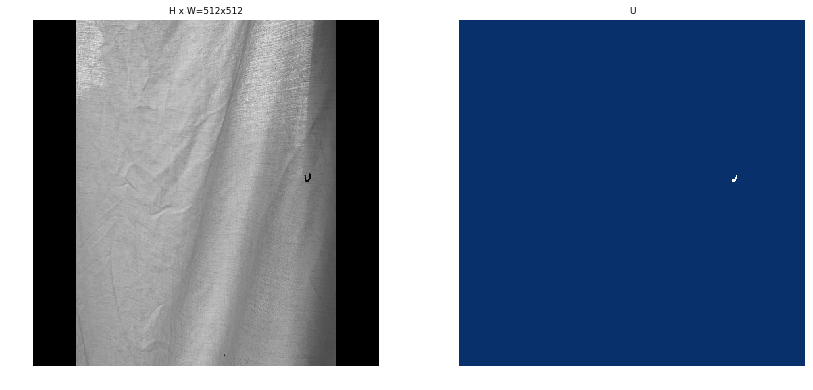

In [76]:
visualize.display_top_masks(image, gt_mask, gt_class_id, dataset_train.class_names, limit=1)
visualize.display_top_masks(image, r['masks'],r['class_ids'], dataset_train.class_names, limit=1)

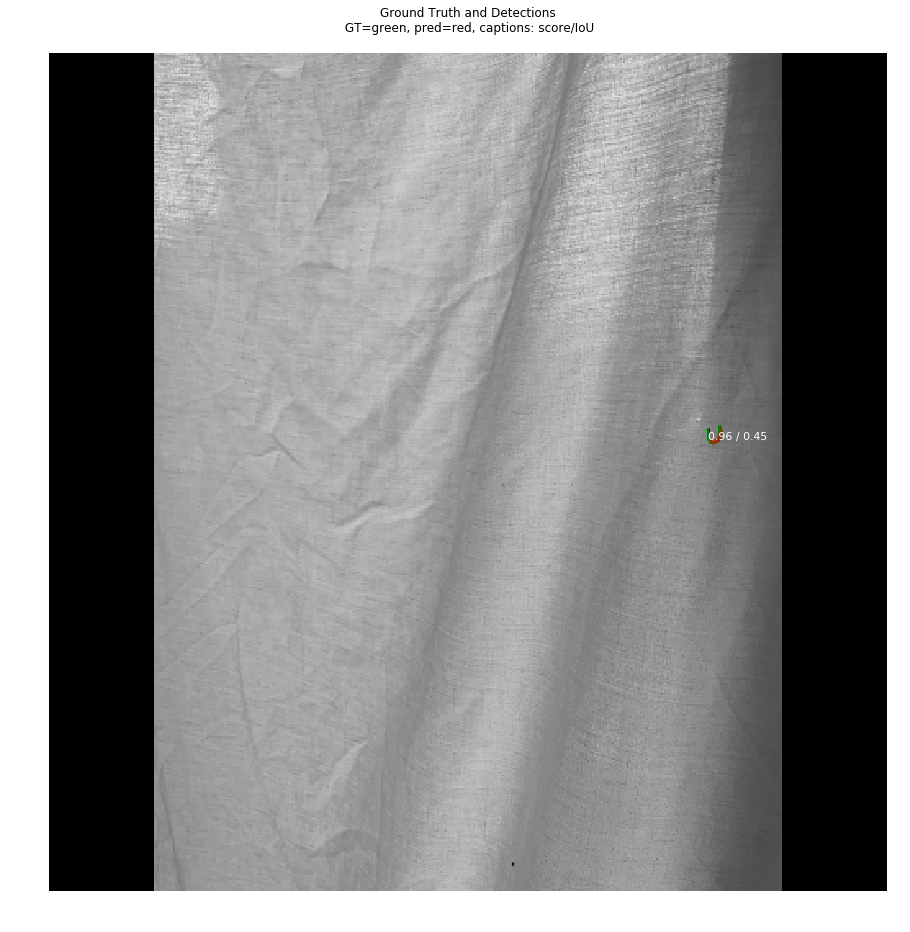

In [77]:
visualize.display_differences(image,
                        gt_bbox, gt_class_id, gt_mask,
                        r["rois"], r["class_ids"], r["scores"], r["masks"],
                        dataset_train.class_names, title="", ax=None,
                        show_mask=True, show_box=False,
                        iou_threshold=0.5, score_threshold=0.5)

In [78]:
np.sum(target * prediction)

23

In [79]:
np.sum(target * prediction) / (np.sum(target) + np.sum(prediction) - np.sum(target * prediction))

0.45098039215686275

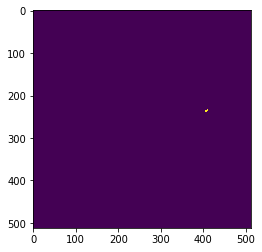

In [80]:
import matplotlib.pyplot as plt
import numpy as np


g = np.floor(np.random.random((100, 100)) + .5)
plt.imshow(prediction[:,:,0])
#plt.imshow(target[:,:,0])
plt.show()